In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv")

In [ ]:
data.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X=data['Salary']
y=data.drop(columns=['Salary'])

<Figure size 864x432 with 0 Axes>

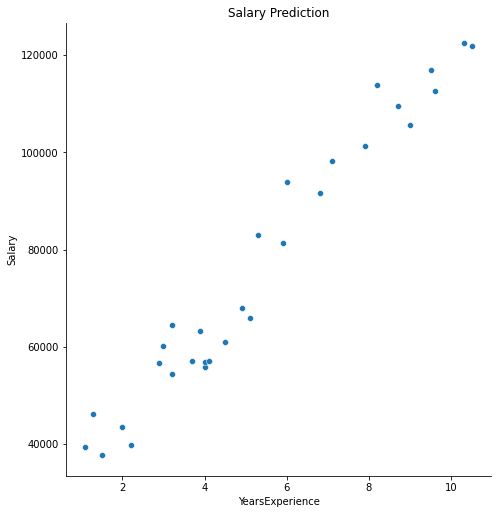

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data for train and test 
train_input, test_input, train_target, test_target = train_test_split(
    X, y, random_state = 42)

In [ ]:
train_input.shape

(22,)

In [ ]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
train_input.shape

(22, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_ ,lr.intercept_ ) # 기울기, y절편

[[0.00010195]] [-2.38359561]


In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9553880313075513
0.9422334865408942


In [ ]:
y_pred = lr.predict(test_input)

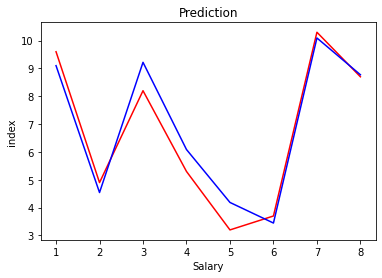

In [ ]:
c = [i for i in range (1,len(test_target)+1,1)]
plt.plot(c,test_target,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

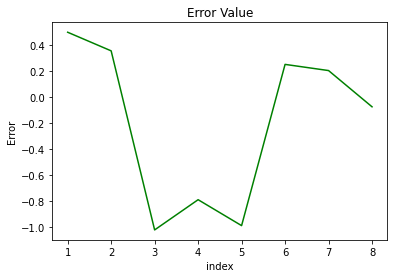

In [ ]:
c = [i for i in range(1,len(test_target)+1,1)]
plt.plot(c,test_target - y_pred, color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)
# Calculate R square vale
rsq = r2_score(test_target,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 0.39034818868217913
r square : 0.9422334865408942


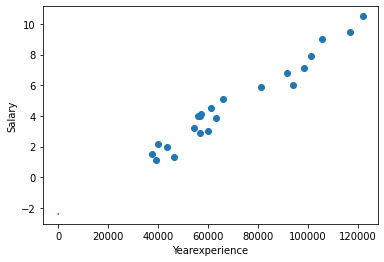

In [ ]:
plt.scatter(train_input, train_target)
#훈련 데이터 선점도
plt.plot([1,11], [float(1*lr.coef_ + lr.intercept_),float( 11* lr.coef_ + lr.intercept_)],'r-')
plt.xlabel('Yearexperience')
plt.ylabel('Salary')
plt.show()